<a href="https://colab.research.google.com/github/SokKanaTorajd/roadque-bangkit21/blob/main/RoadQue_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2

In [2]:
# Download datasets

# this dataset is corrupted. (Japan's train annotations is missing)
# !wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5ty2wb6gvg-1.zip"

# We use this one from different source.
# train dataset
!wget "https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz"

# test-1 and test-2 datasets
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/c7c98ce8-f5df-4fd6-8249-8c327a7228ce/file_downloaded" -O test1.tar.gz
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/cd7f2818-803d-471b-8a44-4c9aec6bd6ef/file_downloaded" -O test2.tar.gz

# file structure
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/7c8780cf-ee51-4880-96bc-3fbde24d1483/file_downloaded" -O FileStructure.txt

--2021-06-01 11:24:22--  https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz
Resolving mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)... 52.219.68.212
Connecting to mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)|52.219.68.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1472626254 (1.4G) [application/x-tar]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>]   1.37G  22.6MB/s    in 98s     

2021-06-01 11:26:01 (14.3 MB/s) - ‘train.tar.gz’ saved [1472626254/1472626254]

--2021-06-01 11:26:01--  https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/c7c98ce8-f5df-4fd6-8249-8c327a7228ce/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP 

In [3]:
# # Unzip Datasets
# !unzip 5ty2wb6gvg-1.zip

# Untar train dataset
!tar -xvf train.tar.gz

Streaming output truncated to the last 5000 lines.
train/Japan/annotations/xmls/Japan_009766.xml
train/Japan/annotations/xmls/Japan_006254.xml
train/Japan/annotations/xmls/Japan_008726.xml
train/Japan/annotations/xmls/Japan_004664.xml
train/Japan/annotations/xmls/Japan_007945.xml
train/Japan/annotations/xmls/Japan_006391.xml
train/Japan/annotations/xmls/Japan_005903.xml
train/Japan/annotations/xmls/Japan_008200.xml
train/Japan/annotations/xmls/Japan_003663.xml
train/Japan/annotations/xmls/Japan_001949.xml
train/Japan/annotations/xmls/Japan_011141.xml
train/Japan/annotations/xmls/Japan_003141.xml
train/Japan/annotations/xmls/Japan_002870.xml
train/Japan/annotations/xmls/Japan_008094.xml
train/Japan/annotations/xmls/Japan_007381.xml
train/Japan/annotations/xmls/Japan_012963.xml
train/Japan/annotations/xmls/Japan_007843.xml
train/Japan/annotations/xmls/Japan_004889.xml
train/Japan/annotations/xmls/Japan_011099.xml
train/Japan/annotations/xmls/Japan_003745.xml
train/Japan/annotations/xmls/

In [4]:
# count images in each train folder
train_dirs = ['train/Czech/images','train/India/images', 'train/Japan/images']

for dir in train_dirs:
  print('{} contains {} images.'.format(dir,len(os.listdir(dir))))

train/Czech/images contains 2829 images.
train/India/images contains 7706 images.
train/Japan/images contains 10506 images.


In [5]:
image_files = []

for dir in (train_dirs):
  for image in os.listdir(dir):
    image = dir + '/' + image 
    image_files.append(image)

In [6]:
print(len(image_files))
print(image_files[0:5])

21041
['train/Czech/images/Czech_003078.jpg', 'train/Czech/images/Czech_001596.jpg', 'train/Czech/images/Czech_000570.jpg', 'train/Czech/images/Czech_001209.jpg', 'train/Czech/images/Czech_003213.jpg']


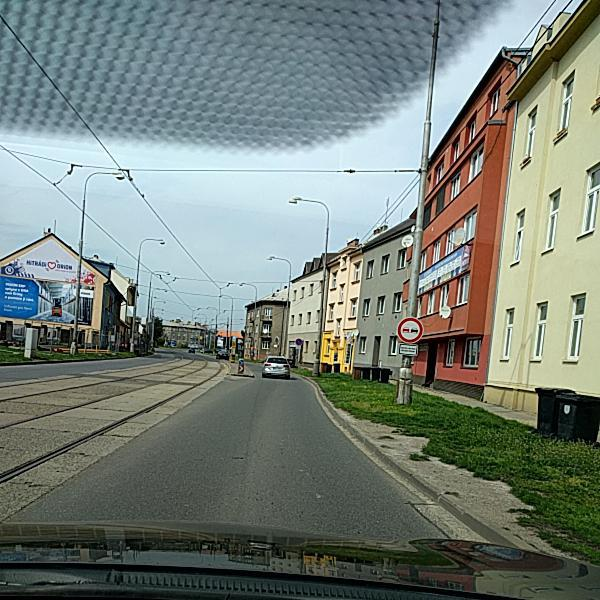

(600, 600, 3)


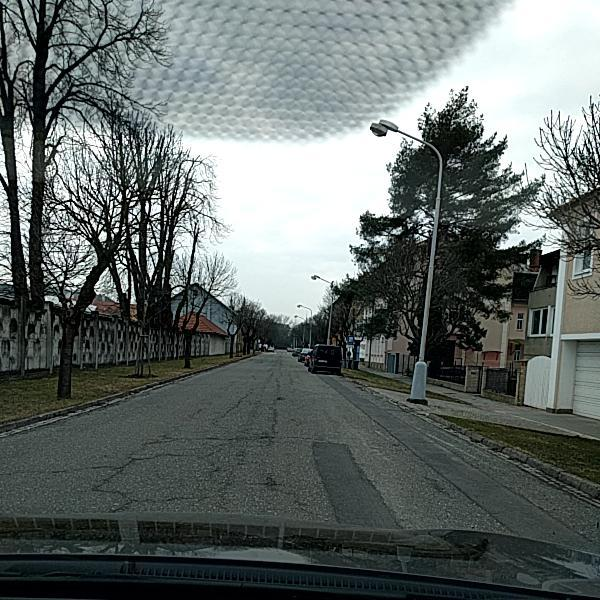

(600, 600, 3)


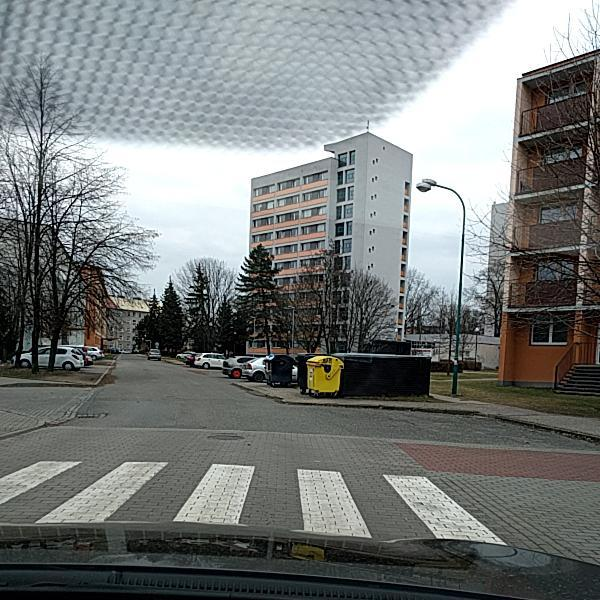

(600, 600, 3)


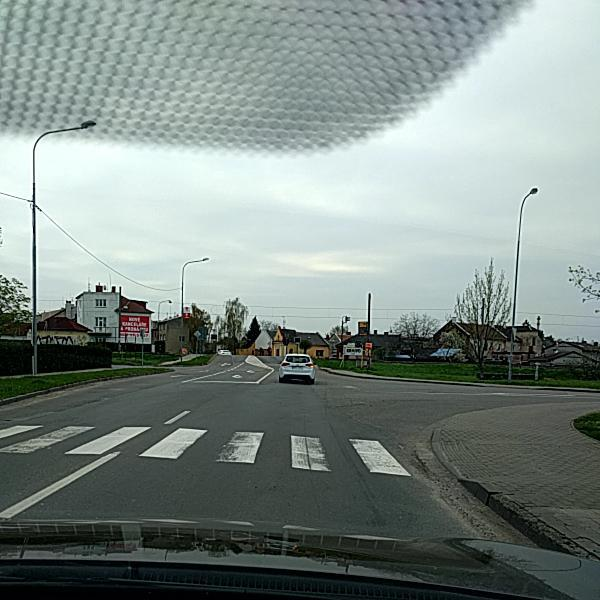

(600, 600, 3)


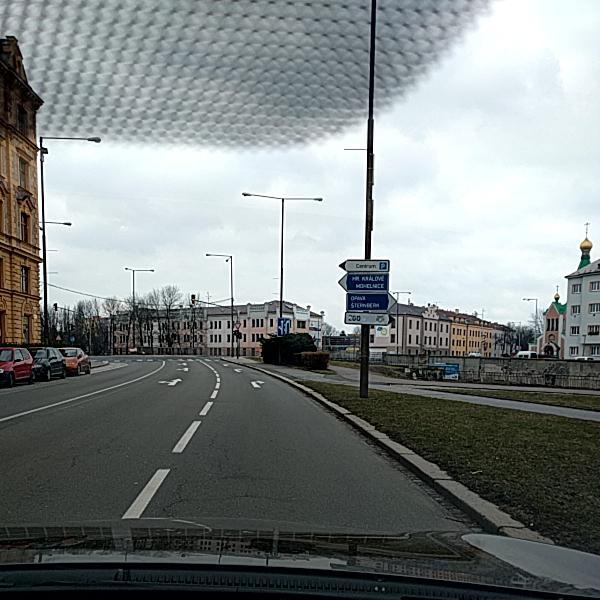

(600, 600, 3)


In [7]:
for i in range(5):
  img = cv2.imread(image_files[i])
  cv2_imshow(img)
  print(img.shape)

In [8]:
annot_files = []
annot_dirs = ['train/Czech/annotations/xmls', 'train/India/annotations/xmls', 'train/Japan/annotations/xmls']

for dir in annot_dirs:
  for xml in os.listdir(dir):
    xml = dir + '/' + xml
    annot_files.append(xml)

In [9]:
print(len(annot_files))
print(annot_files[0:5])

21041
['train/Czech/annotations/xmls/Czech_001521.xml', 'train/Czech/annotations/xmls/Czech_000480.xml', 'train/Czech/annotations/xmls/Czech_000935.xml', 'train/Czech/annotations/xmls/Czech_002339.xml', 'train/Czech/annotations/xmls/Czech_003430.xml']


In [10]:
image_files = sorted(image_files)
print(image_files[:10])

annot_files = sorted(annot_files)
print(annot_files[:10])

['train/Czech/images/Czech_000000.jpg', 'train/Czech/images/Czech_000001.jpg', 'train/Czech/images/Czech_000002.jpg', 'train/Czech/images/Czech_000006.jpg', 'train/Czech/images/Czech_000007.jpg', 'train/Czech/images/Czech_000009.jpg', 'train/Czech/images/Czech_000010.jpg', 'train/Czech/images/Czech_000011.jpg', 'train/Czech/images/Czech_000012.jpg', 'train/Czech/images/Czech_000013.jpg']
['train/Czech/annotations/xmls/Czech_000000.xml', 'train/Czech/annotations/xmls/Czech_000001.xml', 'train/Czech/annotations/xmls/Czech_000002.xml', 'train/Czech/annotations/xmls/Czech_000006.xml', 'train/Czech/annotations/xmls/Czech_000007.xml', 'train/Czech/annotations/xmls/Czech_000009.xml', 'train/Czech/annotations/xmls/Czech_000010.xml', 'train/Czech/annotations/xmls/Czech_000011.xml', 'train/Czech/annotations/xmls/Czech_000012.xml', 'train/Czech/annotations/xmls/Czech_000013.xml']


In [11]:
import pandas as pd

# create dataframe to match between image file and annotation file

df = pd.DataFrame(list(zip(image_files, annot_files)), 
                  columns=['image file', 'annotation'])

In [12]:
print(df.head())

                            image file                                     annotation
0  train/Czech/images/Czech_000000.jpg  train/Czech/annotations/xmls/Czech_000000.xml
1  train/Czech/images/Czech_000001.jpg  train/Czech/annotations/xmls/Czech_000001.xml
2  train/Czech/images/Czech_000002.jpg  train/Czech/annotations/xmls/Czech_000002.xml
3  train/Czech/images/Czech_000006.jpg  train/Czech/annotations/xmls/Czech_000006.xml
4  train/Czech/images/Czech_000007.jpg  train/Czech/annotations/xmls/Czech_000007.xml


In [13]:
df.describe()

image file                                     annotation
count                                 21041                                          21041
unique                                21041                                          21041
top     train/Czech/images/Czech_001782.jpg  train/India/annotations/xmls/India_006146.xml
freq                                      1                                              1

In [14]:
import xml.etree.ElementTree as ET

In [15]:
# xml_exs = ['train/Japan/annotations/xmls/Japan_000000.xml', 
#             'train/Japan/annotations/xmls/Japan_000004.xml', 
#             'train/Japan/annotations/xmls/Japan_000008.xml', 
#             'train/Japan/annotations/xmls/Japan_000010.xml']

tree = ET.parse('train/Japan/annotations/xmls/Japan_000008.xml')
root = tree.getroot()

In [16]:
for elem in root:
  print(elem)
  for sub in elem:
    print(sub.text)

<Element 'folder' at 0x7f34b6897fb0>
<Element 'filename' at 0x7f34b68a2050>
<Element 'size' at 0x7f34b68a20b0>
600
600
<Element 'segmented' at 0x7f34b68a2230>
<Element 'object' at 0x7f34b68a2290>
D44

            


In [17]:
def annotation_check(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()
  for elems in root:
    for e in elems:
      if ('D00' in e.text) or ('D10' in e.text) or ('D20' in e.text) or ('D40' in e.text):
        return True

In [18]:
def split_data(dataframe, column_name:str):
  cleaned_index_data = []
  for xml in dataframe[column_name]:
    checked = annotation_check(xml)
    if checked:
      index = dataframe[dataframe[column_name]==xml].index[0]
      cleaned_index_data.append(index)
  return cleaned_index_data

In [19]:
cleaned_idx = split_data(df, 'annotation')

In [20]:
print(len(cleaned_idx))

12195


In [21]:
new_df = df.loc[cleaned_idx].reset_index(drop=True)

In [22]:
print(new_df.describe())
print(new_df.head())

                                 image file                                     annotation
count                                 12195                                          12195
unique                                12195                                          12195
top     train/Japan/images/Japan_003594.jpg  train/Japan/annotations/xmls/Japan_003241.xml
freq                                      1                                              1
                            image file                                     annotation
0  train/Czech/images/Czech_000006.jpg  train/Czech/annotations/xmls/Czech_000006.xml
1  train/Czech/images/Czech_000010.jpg  train/Czech/annotations/xmls/Czech_000010.xml
2  train/Czech/images/Czech_000020.jpg  train/Czech/annotations/xmls/Czech_000020.xml
3  train/Czech/images/Czech_000021.jpg  train/Czech/annotations/xmls/Czech_000021.xml
4  train/Czech/images/Czech_000022.jpg  train/Czech/annotations/xmls/Czech_000022.xml


In [23]:
# let's draw the annotation per image

def add_bndbox(image, annotation):
  annotated_image = cv2.imread(image)
  tree = ET.parse(annotation)
  root = tree.getroot()

  for obj in root.iter('object'):
    label = obj.find('name').text
    if ('D00' in label) or ('D10' in label) or ('D20' in label) or ('D40' in label):
      box = obj.find('bndbox')
      xmin = int(box.find('xmin').text)
      xmax = int(box.find('xmax').text)
      ymin = int(box.find('ymin').text)
      ymax = int(box.find('ymax').text)

      font = cv2.FONT_HERSHEY_SIMPLEX

      cv2.putText(annotated_image, label, (xmin, ymin-10), font, 1,
                  (0, 255, 0), 2, cv2.LINE_AA)
      
      cv2.rectangle(annotated_image, (xmin, ymin), (xmax, ymax), 
                    (0, 255, 0), 3)

  return annotated_image

In [24]:
annotation_sample = new_df.sample(10).reset_index(drop=True)
annotation_sample.head()

image file                                     annotation
0  train/Japan/images/Japan_005698.jpg  train/Japan/annotations/xmls/Japan_005698.xml
1  train/India/images/India_006097.jpg  train/India/annotations/xmls/India_006097.xml
2  train/Japan/images/Japan_003761.jpg  train/Japan/annotations/xmls/Japan_003761.xml
3  train/India/images/India_009723.jpg  train/India/annotations/xmls/India_009723.xml
4  train/Japan/images/Japan_005638.jpg  train/Japan/annotations/xmls/Japan_005638.xml

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

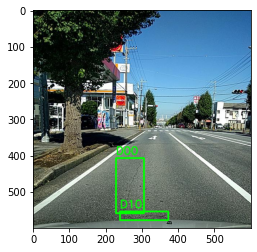

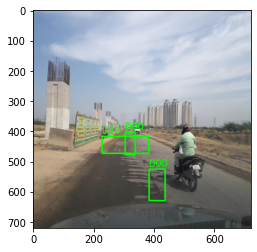

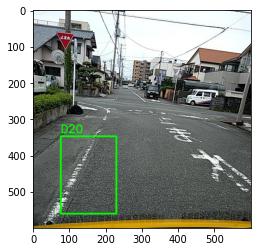

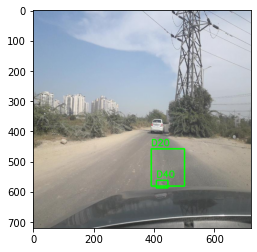

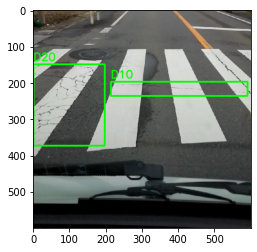

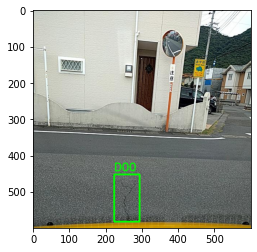

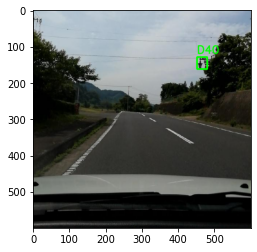

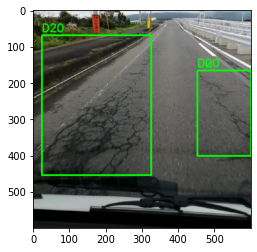

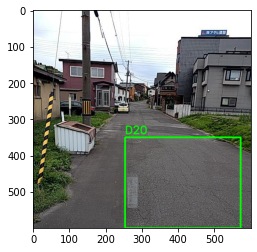

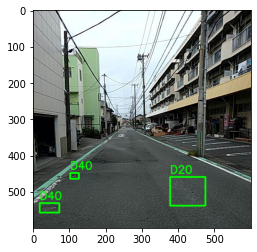

In [26]:
for i in range(len(annotation_sample)):
  img = annotation_sample['image file'][i]
  annot = annotation_sample['annotation'][i]
  annotated = add_bndbox(img, annot)
  plt.subplot(1, 1, 1)
  plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
  plt.show()

In [27]:
#save train sample
new_df.to_csv('./train_dataset.csv', index=False)

In [28]:
import shutil

In [40]:
def get_filename_from_df(data):
  filename = data.split('/')[-1]
  return filename

In [44]:
for y in annotation_sample['image file'].tolist():
  print('data-train/images/'+get_filename_from_df(y))

data-train/images/Japan_005698.jpg
data-train/images/India_006097.jpg
data-train/images/Japan_003761.jpg
data-train/images/India_009723.jpg
data-train/images/Japan_005638.jpg
data-train/images/Japan_004158.jpg
data-train/images/Japan_003187.jpg
data-train/images/Japan_002964.jpg
data-train/images/Japan_006431.jpg
data-train/images/Japan_012691.jpg


In [45]:
def copy_file(src_dir, dst_dir):
  for my_file in src_dir:
    filename = get_filename_from_df(my_file)
    shutil.copyfile(my_file, dst_dir+filename)

In [38]:
IMAGE_DIR = 'data-train/images/'
ANNOT_DIR = 'data-train/annotations/'

In [31]:
os.makedirs(IMAGE_DIR)
os.makedirs(ANNOT_DIR)

In [46]:
# copy annotation file
copy_file(new_df['annotation'].tolist(), ANNOT_DIR)

In [49]:
# copy image file
copy_file(new_df['image file'].tolist(), IMAGE_DIR)

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# save csv file into Google Drive
!cp -r "/content/train_dataset.csv" "/content/drive/MyDrive/Docs Team B21-CAP0348/"

In [60]:
# copy label map into data-train into Google Drive
!cp -r "/content/train/label_map.pbtxt" "/content/drive/MyDrive/Docs Team B21-CAP0348/"

In [63]:
# compress data-train into tar.gz file
import tarfile

with tarfile.open('data-train.tar.gz', "w:gz") as tar:
  tar.add('data-train', arcname=os.path.basename('data-train'))

In [64]:
# copy to google drive
!cp -r "/content/data-train.tar.gz" "/content/drive/MyDrive/Docs Team B21-CAP0348/"